1. Del artículo:
https://www.nature.com/articles/s41598-020-59821-7

Consultar y explicar los dos métodos de reducción de ruido usados en el artículo: Robust LOESS y Non Local Means (10%), mostrar cómo se podrían implementar en Python (5%)

https://virtual.cuautitlan.unam.mx/intar/?page_id=1108#:~:text=Las%20wavelets%20pueden%20ser%20irregulares,,%20la%20wavelet%20Symlet,%20etc
https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-01349-x

2. De la base de datos extraer los registros que correspondan a bradicardia sinusal (SB Sinus Bradycardia) y fibrilación auricular (AFIB Atrial Fibrillation). De estos registros los análisis para el presente proyecto deben hacerse en la derivación II.

In [1]:
import os  ; import pandas as pd ; import numpy as np ; import matplotlib.pyplot as plt ; from scipy import signal
#from google.colab import drive
# drive.mount('/content/drive')
# !pip install PyWavelets
import pywt
# !cp /content/drive/MyDrive/Biosenales/ECGData.zip .
# !unzip ECGData.zip


In [2]:
%run Funciones.py import Add
%run Flujo_1.py import Add
%run Flujo_2.py import Add
%run Flujo_3.py import Add

prueba_saludar("Isabella y Zamanta")

Hola, Isabella y Zamanta!


In [3]:
directorio_actual=os.getcwd()
archivos=os.listdir(directorio_actual + "/ECGData")
#file_path = '/content/drive/MyDrive/Biosenales/Diagnostics.xlsx'
file_path = 'E:\ACTUAL\BIOSIGNALS\GIT\LAB_ISA_ZAM\Lab_Biosenales\Proyecto_3\Diagnostics.xlsx'

Diagnostics = pd.read_excel(file_path, sheet_name='Sheet1')    # Extraer clasificaciones sujetos
Col_Nombres = pd.DataFrame(Diagnostics.iloc[:,0:2])

Nombres_SB = Col_Nombres[Col_Nombres['Rhythm']=='SB']
Nombres_AFIB = Col_Nombres[Col_Nombres['Rhythm']=='AFIB']

lista_filtrada_SB=[] #Lista con los datos de SB y AFIB
lista_filtrada_AFIB=[] #Lista con los datos de AFIB

for i in range(len(archivos)):
    if archivos[i] in Nombres_SB['FileName'].values+'.csv':
      lista_filtrada_SB.append(archivos[i])

    if archivos[i] in Nombres_AFIB['FileName'].values+'.csv':
        lista_filtrada_AFIB.append(archivos[i])

<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
C:\Users\tamay\AppData\Local\Temp\ipykernel_20000\2720241653.py:4: SyntaxWarning: invalid escape sequence '\A'
  file_path = 'E:\ACTUAL\BIOSIGNALS\GIT\LAB_ISA_ZAM\Lab_Biosenales\Proyecto_3\Diagnostics.xlsx'


In [4]:
Derivacion2_AFIB=[]
Derivacion2_SB=[]

for i in lista_filtrada_AFIB:
    datos = pd.read_csv(directorio_actual+"/ECGData/"+i,delimiter=',',names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4','V5','V6'])
    Derivacion2_AFIB.append(datos['II'])

for i in lista_filtrada_SB:
    datos = pd.read_csv(directorio_actual+"/ECGData/"+i,delimiter=',',names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4','V5','V6'])
    Derivacion2_SB.append(datos['II'])
    
Derivacion2_AFIB=np.array(Derivacion2_AFIB)
Derivacion2_SB=np.array(pd.DataFrame(Derivacion2_SB))

In [5]:
#Se quita el primer valor de los arreglos que es un 'II'
Der2_AFIB=np.delete(Derivacion2_AFIB,0,axis=1)
Der2_SB=np.delete(Derivacion2_SB,0,axis=1)

#Se pasan todos los datos de string a float 
for i in range(len(Der2_AFIB)):
  Der2_AFIB[i]=Str2Num_Vector(Der2_AFIB[i])
for i in range(len(Der2_SB)):
  Der2_SB[i]=Str2Num_Vector(Der2_SB[i])
print("DATOS AFIB: ",Der2_AFIB.shape)
print("DATOS SB: "  ,Der2_SB.shape)

DATOS AFIB:  (1780, 5000)
DATOS SB:  (3889, 5000)


3. Consultar que otros tipos de señales wavelet se pueden usar para el análisis de señales ECG y adaptar el código del filtro wavelet que se entrega en el curso de acuerdo a la consulta (10%)

De acuerdo a la teoría, entre más similar sea la forma de onda de la señal wavelet, mejor será la eliminación del ruido de la señal [1]. Algunos tipos de wavelet que son implementados para analizar señales de ECG son el wavelet Daubechies [2] y el Wavelet Symlet [3] y ambos presentan una simetría similar a la onda del complejo QRS.
Múltiples estudios han analizado las estucturas y familias de transformadas wavelet con el objetivo de eliminar las desviaciones de linea base de señales ECG, siendo las familias de wavelets Daubechies-3 y Symlets-3 transformadas con un desempeño destacable [4], siendo la métrica de evaluación el error cuadrático medio (MSE). Para contruir estos tipos de wavelets fue necesario emplear 7 niveles de transformada.

---

[1] “Transformada Wavelet – acervo para el mejoramiento del aprendizaje de alumnos de ingeniería, en Inteligencia Artificial”. Accedido el 1 de noviembre de 2024. [En línea]. Disponible: https://virtual.cuautitlan.unam.mx/intar/?page_id=1108#:~:text=Las%20wavelets%20pueden%20ser%20irregulares,,%20la%20wavelet%20Symlet,%20etc.

[2] “Vista de Las wavelets en el análisis de ECG”. Revistas UTP. Accedido el 1 de noviembre de 2024. [En línea]. Disponible: https://revistas.utp.edu.co/index.php/revistaciencia/article/view/13781/9361

[3] “Caracterización con wavelets de alteraciones electrocardiográficas en pacientes con enfermedad de Chagas”. SciELO Colombia- Scientific Electronic Library Online. Accedido el 1 de noviembre de 2024. [En línea]. Disponible: http://www.scielo.org.co/scielo.php?script=sci_arttext&amp;pid=S0121-37092015000200009

[4] “Comparing different wavelet transforms on removing electrocardiogram baseline wanders and special trends - BMC Medical Informatics and Decision Making”. BioMed Central. Accedido el 1 de noviembre de 2024. [En línea]. Disponible: https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-01349-x


### Según lo anterior, se comparan los Wavelet Daubechies (db3) y Symlet (sym3) para determinar el que será utilizado en el flujo posterior de trabajo.

In [6]:
print(pywt.Wavelet('db3'))
print(pywt.Wavelet('sym3'))

Wavelet db3
  Family name:    Daubechies
  Short name:     db
  Filters length: 6
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False
Wavelet sym3
  Family name:    Symlets
  Short name:     sym
  Filters length: 6
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       near symmetric
  DWT:            True
  CWT:            False


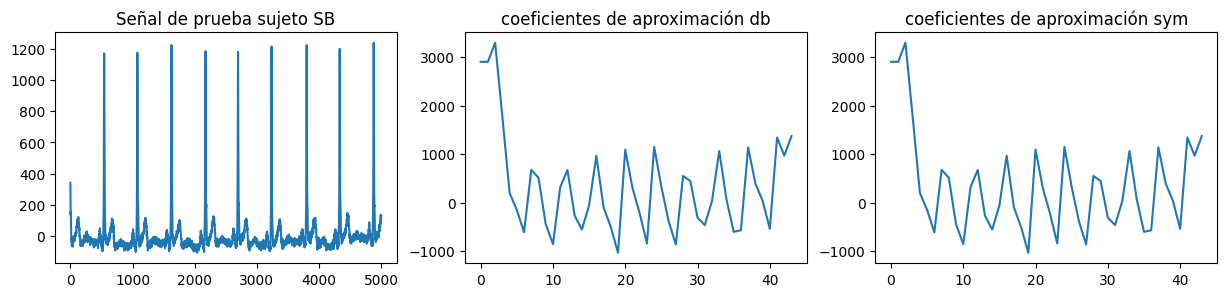

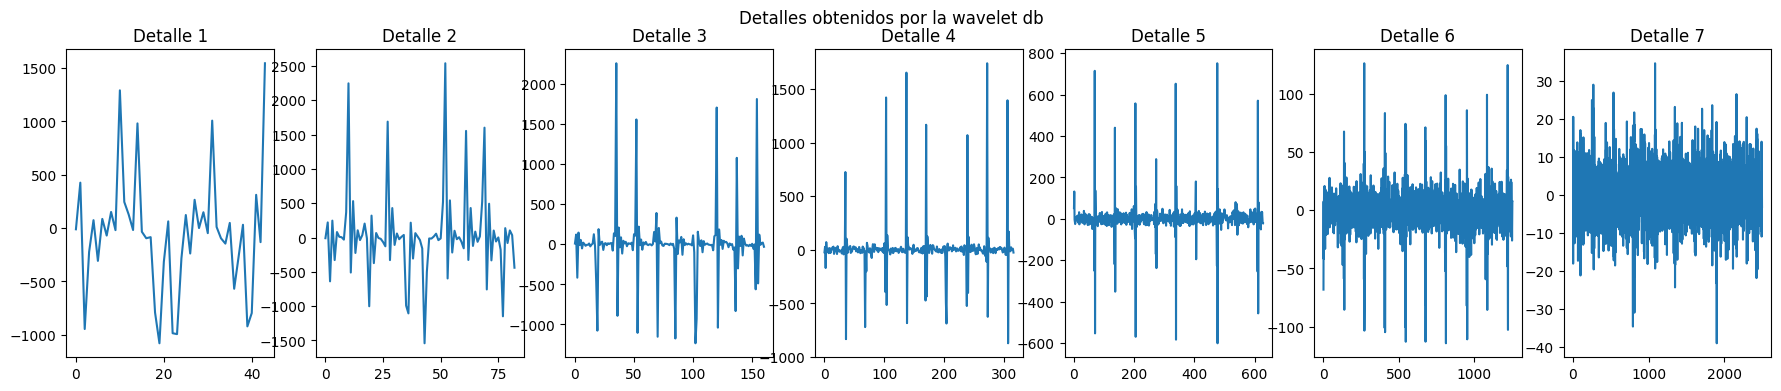

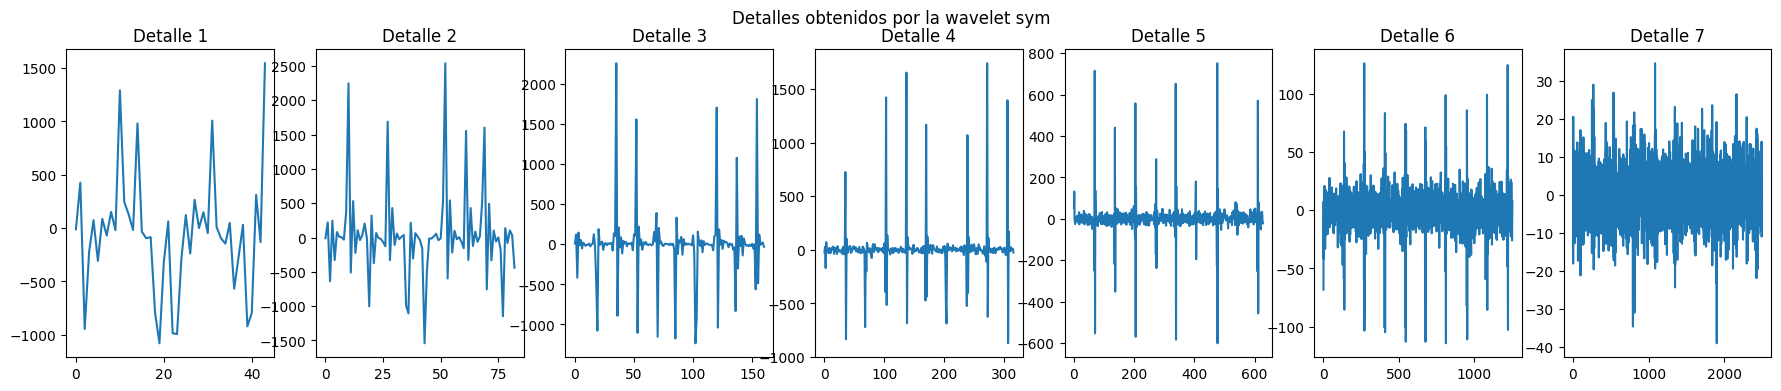

In [7]:
#Wavelet Daubechies 3
data_wavelet_db = pywt.wavedec( Der2_SB[0], 'db3', level=7 )
details_db = data_wavelet_db[1:]
#Wavelet Symlets 3
data_wavelet_sym = pywt.wavedec( Der2_SB[0], 'sym3', level=7 )
details_sym = data_wavelet_sym[1:]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
axes[0].plot(Der2_SB[0])            ; axes[0].set_title('Señal de prueba sujeto SB')
axes[1].plot(data_wavelet_db[0])    ; axes[1].set_title('coeficientes de aproximación db')
axes[2].plot(data_wavelet_sym[0])    ; axes[2].set_title('coeficientes de aproximación sym')

Plot_Detalles(data_wavelet_db,"db")
Plot_Detalles(data_wavelet_sym,"sym")

### Con lo cuál, dado que ambas wavelet consultadas muestran resultados equivalentes, se aplica el flujo de trabajo utilizando el Wavelet Daubechies (db3) 

4. Escoger 10 señales al azar y aplicar un flujo de procesamiento que conste de:

In [8]:
senal_aleatoria_AFIB = diez_senales_aleatorias(Der2_AFIB)
senal_aleatoria_SB = diez_senales_aleatorias(Der2_SB)
print("SEÑALES ALEATORIAS SB: ",    senal_aleatoria_SB.shape)
print("SEÑALES ALEATORIAS AFIB: ",  senal_aleatoria_AFIB.shape)


SEÑALES ALEATORIAS SB:  (10, 5000)
SEÑALES ALEATORIAS AFIB:  (10, 5000)


Se guardaron 10 señales aleatorias fijas para el análisis :

In [9]:
Guardar_Senales_aleatorias(senal_aleatoria_AFIB,senal_aleatoria_SB)

Basados en varios estudios [5][6], se usará un filtro FIR pasa bajas con una ventana tipo **Kaiser** pues ha demostrado una mejor efectividad a la hora de eliminar ruido de las señales ECG en comparación a otras ventanas.

En el caso del filtro pasa altas, en la literatura [7] también se encontró que una ventana tipo **Kaiser** se pueden eliminar los ruidos de la señal sin generar grandes distorsiones en su forma de onda.

El orden será calculado empleando las **tablas** con los reportes de la liteartura para cada ventana proporcionadas en clase y la frecuencia de muestreo especificada en la base de datos que es de 500 Hz.

---


[5] bharati sharma. “"Analysis of Various Window Techniques used for denoising ECG signal"”. Academia.edu - Find Research Papers, Topics, Researchers. Accedido el 2 de noviembre de 2024. [En línea]. Disponible: https://www.academia.edu/27783089/_Analysis_of_Various_Window_Techniques_used_for_denoising_ECG_signal_

[6] I. R. Publications. “Performance Comparison of Windowing Techniques for ECG Signal Enhancement”. Academia.edu - Find Research Papers, Topics, Researchers. Accedido el 2 de noviembre de 2024. [En línea]. Disponible: https://www.academia.edu/9884525/Performance_Comparison_of_Windowing_Techniques_for_ECG_Signal_Enhancement

[7] Manoj, Vinod Kumar y Sanjeev Kumar Dhull. IJRAT - International Journal of Research in Advent Technology. Accedido el 2 de noviembre de 2024. [En línea]. Disponible: https://ijrat.org/downloads/Vol-2/may-2014/paper%20ID-252014114.pdf


### Se define una función por cada flujo (ver scripts complementarios):

# Flujo 1
1. Filtro pasa-altas usando filtro IIR a 0.5 Hz. Justificar la elección de parámetros y si se usa FIR o IIR
2. Filtro wavelet modificado del punto 3
3. Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR

### EJEMPLO FLUJO 1

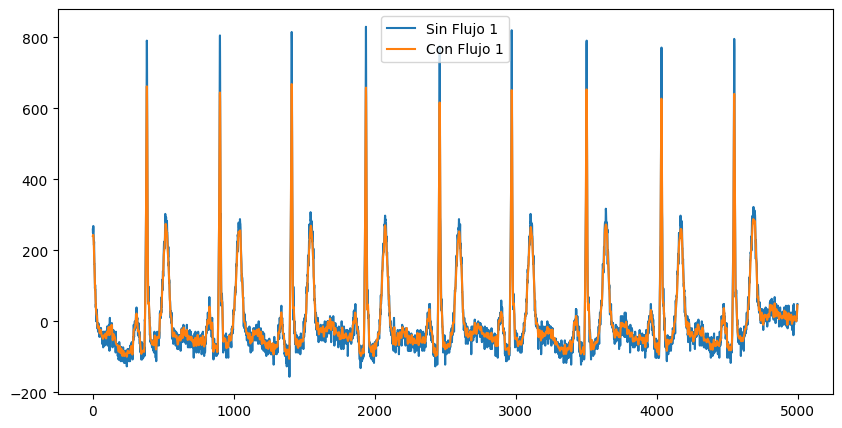

In [10]:
senal_aleatoria_SB_F1 = []
for i in range(len(senal_aleatoria_SB)):
  senalF1=Flujo1(senal_aleatoria_SB[i].astype(float))
  senal_aleatoria_SB_F1.append(senalF1)

plt.figure(figsize=(10, 5))
plt.plot(senal_aleatoria_SB[0],label="Sin Flujo 1") ; plt.plot(senal_aleatoria_SB_F1[0],label="Con Flujo 1")
plt.legend() ; plt.show()

# Flujo 2
1. Detrend
2. Filtro wavelet modificado del punto 3
3. Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR

### EJEMPLO FLUJO 2

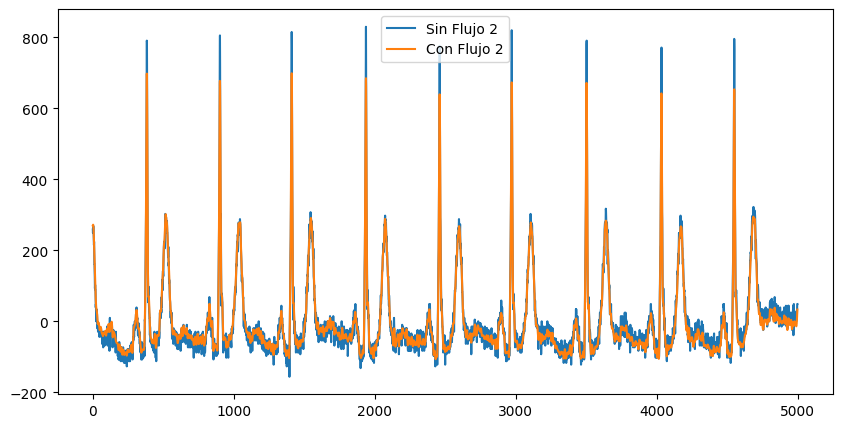

In [11]:
senal_aleatoria_SB_F2 = []
for i in range(len(senal_aleatoria_SB)):
  senalF2=Flujo2(senal_aleatoria_SB[i].astype(float))
  senal_aleatoria_SB_F2.append(senalF2)
  
plt.figure(figsize=(10, 5))
plt.plot(senal_aleatoria_SB[0],label="Sin Flujo 2") ; plt.plot(senal_aleatoria_SB_F2[0],label="Con Flujo 2")
plt.legend() ; plt.show()

# Flujo 3
1. Filtro pasa-altas usando filtro IIR a 0.5 Hz. Justificar la elección de parámetros y si se usa FIR o IIR
2. Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR

### EJEMPLO FLUJO 3

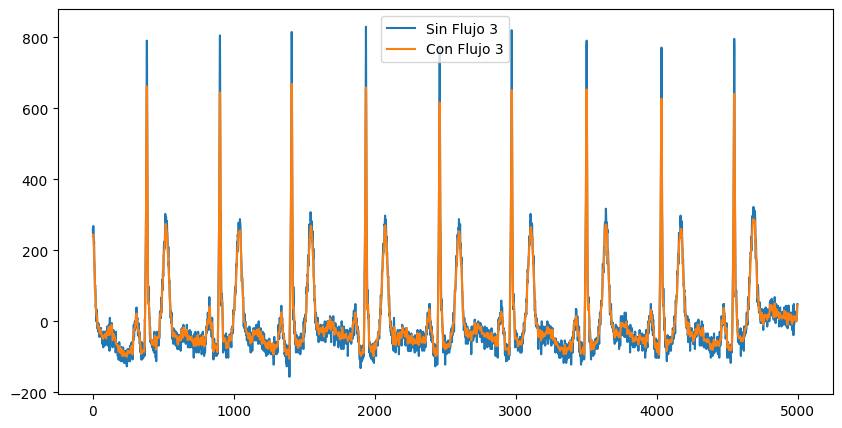

In [12]:
senal_aleatoria_SB_F3 = []
for i in range(len(senal_aleatoria_SB)):
  senalF3=Flujo3(senal_aleatoria_SB[i].astype(float))
  senal_aleatoria_SB_F3.append(senalF3)
  
plt.figure(figsize=(10, 5))
plt.plot(senal_aleatoria_SB[0],label="Sin Flujo 3") ; plt.plot(senal_aleatoria_SB_F3[0],label="Con Flujo 3")
plt.legend(); plt.show()

**Describir los resultados obtenidos y decidir si el resto del procesamiento se hace con el flujo 1, el flujo 2 o el flujo 3 (20%)**

**Con el flujo seleccionado procesar las señales de la base de datos ECGData.zip derivación II.**

**A las señales filtradas con el flujo seleccionado aplicar el procesamiento de normalización usado en el proyecto 2.**



### Aplicación Flujo 2 de Trabajo , Normalización y Cálculo de Frecuencias con la Máxima Potencia:


In [13]:
lista_flujo_afib = [] ; lista_flujo_sb = []   ;  lista_FrecMaxPot_AFIB = [] ; lista_FrecMaxPot_SB = []

for i in range(len(Der2_AFIB)):
  afib = Flujo2(Der2_AFIB[i].astype(float))
  afib = Detrend(afib)  ;  afib = comprimir(afib) ;  afib = Detrend(afib) ;  max_pot = Frec_MaxPot(afib) 
  lista_FrecMaxPot_AFIB.append(max_pot)  ;   lista_flujo_afib.append(afib)

for i in range(len(Der2_SB)):
  sb = Flujo2(Der2_SB[i].astype(float))
  sb = Detrend(sb) ;  sb = comprimir(sb)  ;  sb = Detrend(sb) ;  max_pot = Frec_MaxPot(sb)
  lista_FrecMaxPot_SB.append(max_pot)    ;   lista_flujo_sb.append(sb)


### EJEMPLO 

Frecuencia máxima potencia sujeto ejemplo:  1.0


Text(0.5, 1.0, 'Detrend 2')

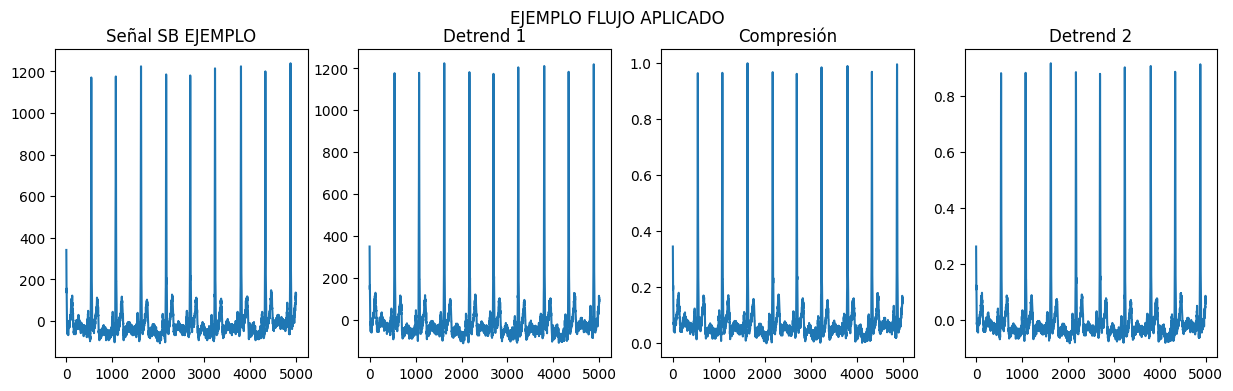

In [14]:
# EJEMPLO
print("Frecuencia máxima potencia sujeto ejemplo: " ,Frec_MaxPot(Der2_SB[0].tolist()))
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle("EJEMPLO FLUJO APLICADO")
axes[0].plot(Der2_SB[0])    ; axes[0].set_title('Señal SB EJEMPLO')
axes[1].plot(Detrend(Der2_SB[0]))    ; axes[1].set_title('Detrend 1')
axes[2].plot(comprimir(Detrend(Der2_SB[0])))    ; axes[2].set_title('Compresión')
axes[3].plot(Detrend(comprimir(Detrend(Der2_SB[0]))))    ; axes[3].set_title('Detrend 2')

5. Para cada señal extraer la frecuencia que contiene la máxima potencia usando Welch (15%)

### EJEMPLO IDENTIFICACION FRECUENCIA CON LA MÁXIMA POTENCIA

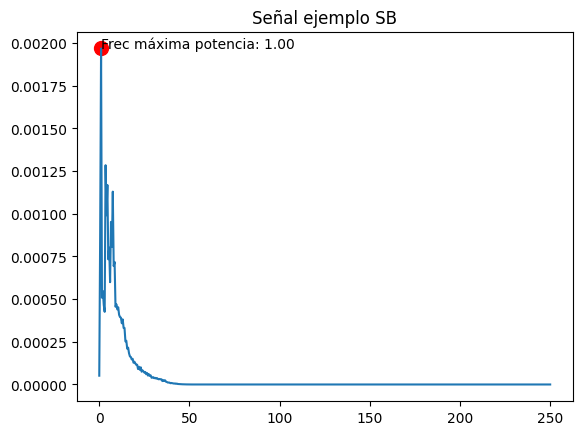

In [15]:
Plot_Frec_MaxPot(lista_flujo_sb[0],"Señal ejemplo SB")

6. Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 3 al 5 y almacene los resultados en un dataframe donde se pueda registro, tipo de patología y el frecuencia de máxima potencia (fMP)

In [16]:
Max_pot_AFIB = np.array(lista_FrecMaxPot_AFIB)  ;   Max_pot_SB = np.array(lista_FrecMaxPot_SB)
patologia = np.concatenate((Nombres_AFIB["Rhythm"] , Nombres_SB["Rhythm"]),axis=0)  ;   fmp = np.concatenate((Max_pot_AFIB,Max_pot_SB),axis=0) ; registro = np.concatenate((Nombres_AFIB["FileName"],Nombres_SB["FileName"]),axis=0)
print(len(patologia),len(fmp),len(registro)) 
data = {'Registro': registro, 'Patología': patologia, 'fMP': fmp}   ; df = pd.DataFrame(data)   ;   df


5669 5669 5669


,Registro,Patología,fMP
0,MUSE_20180113_171327_27000,AFIB,4.5
1,MUSE_20180114_075026_69000,AFIB,4.0
2,MUSE_20180113_133901_16000,AFIB,0.5
3,MUSE_20180116_123940_90000,AFIB,0.5
4,MUSE_20180114_075003_61000,AFIB,3.5
...,...,...,...
5664,MUSE_20180114_070348_17000,SB,7.5
5665,MUSE_20180114_134724_10000,SB,3.5
5666,MUSE_20180113_122544_20000,SB,7.0
5667,MUSE_20180114_074720_85000,SB,1.0


7. Comparar los resultados de fMP del proyecto 3 con los del proyecto 2 usando estadística descriptiva: gráficos y pruebas de hipótesis (15%) Discuta si hay más diferencias entre los tipos de señales con el flujo de procesamiento propuesto respecto al que se trabajó en el proyecto 2.

In [17]:
df_anterior = pd.read_excel("datos_df_corregidos.xlsx") ;   df_anterior   

,Registro,Estado,fMP,sFSB
0,MUSE_20180111_155154_74000,AFIB,9.7,2549
1,MUSE_20180111_155203_15000,AFIB,2.7,3374
2,MUSE_20180111_155903_57000,AFIB,2.2,3781
3,MUSE_20180111_155945_02000,AFIB,4.2,1058
4,MUSE_20180111_160053_89000,AFIB,2.9,646
...,...,...,...,...
5663,MUSE_20180120_123636_14000,SB,5.7,792
5664,MUSE_20180120_123723_19000,SB,2.5,630
5665,MUSE_20180120_123729_60000,SB,6.9,792
5666,MUSE_20180120_123811_50000,SB,1.9,3853


Se extraen los conjuntos de datos, de forma que se tienen 4 vectores, la fmp obtenidas de AFIB y SB con el flujo de trabajo utilizado y las obtenidas en el Proyecto 2 :

In [18]:
Max_pot_AFIB    ,   Max_pot_SB      # VECTORES FLUJO DE TRABAJO ACTUAL
# Filtrar los datos donde Estado == 'AFIB'
df_afib_anterior = df_anterior[df_anterior['Estado'] == 'AFIB'] ;       Max_pot_AFIB_anterior = df_afib_anterior['fMP'] # FMP AFIB PROYECTO 2
# Filtrar los datos donde Estado == 'SB'        
df_sb_anterior = df_anterior[df_anterior['Estado'] == 'SB']     ;       Max_pot_SB_anterior = df_sb_anterior['fMP']     # FMP SB PROYECTO 2


Se procede a aplicar estadística descriptiva a los datos :

Los datos AFIB ANTERIOR NO siguen una distribución normal.
Los datos SB ANTERIOR NO siguen una distribución normal.
Los datos AFIB ACTUAL NO siguen una distribución normal.
Los datos SB ACTUAL NO siguen una distribución normal.


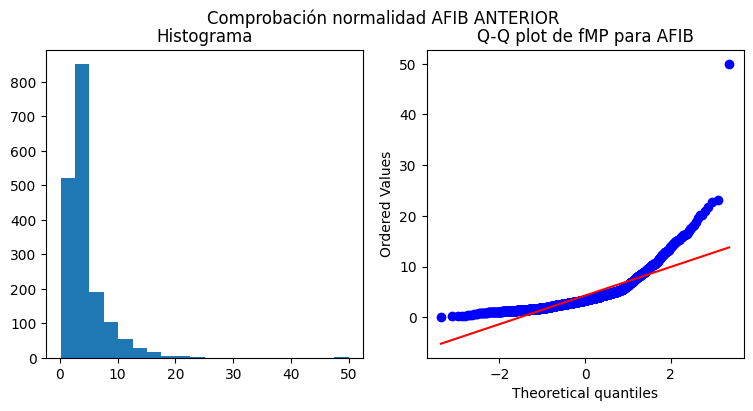

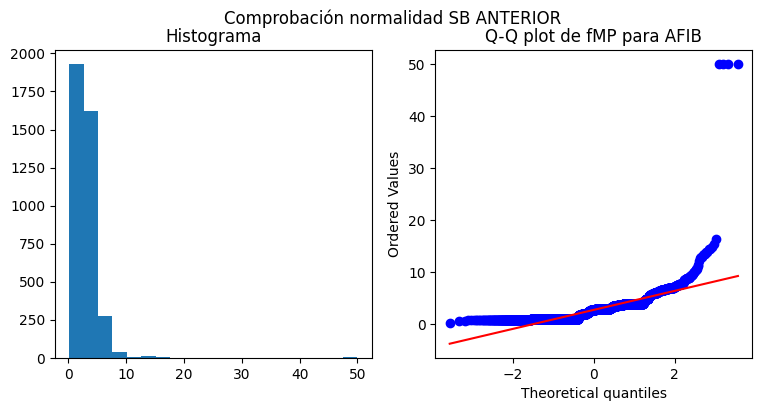

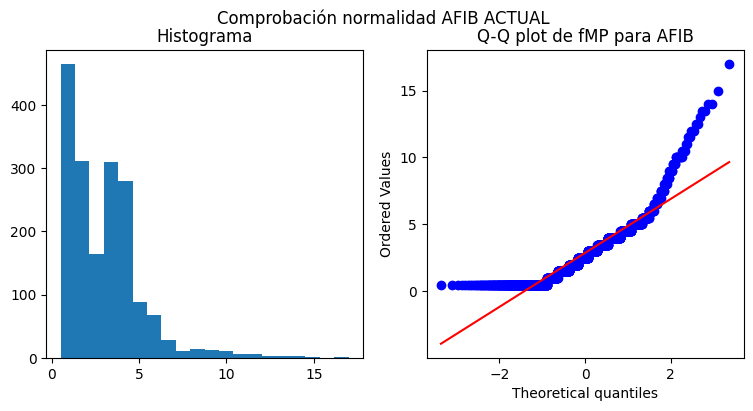

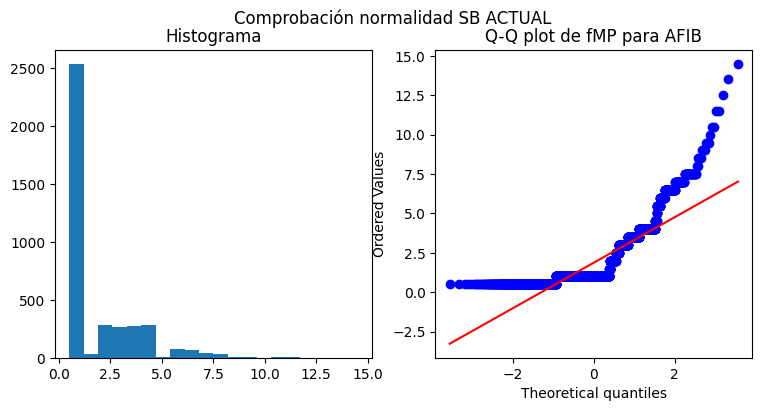

In [19]:
print(evaluar_normalidad(Max_pot_AFIB_anterior,"AFIB ANTERIOR")) ; print(evaluar_normalidad(Max_pot_SB_anterior,"SB ANTERIOR"))
print(evaluar_normalidad(Max_pot_AFIB,"AFIB ACTUAL"))   ;   print(evaluar_normalidad(Max_pot_SB,"SB ACTUAL"))

graficas_normalidad(Max_pot_AFIB_anterior,"AFIB ANTERIOR")  ;   graficas_normalidad(Max_pot_SB_anterior,"SB ANTERIOR")
graficas_normalidad(Max_pot_AFIB,"AFIB ACTUAL") ;   graficas_normalidad(Max_pot_SB,"SB ACTUAL")


8. Hacer un informe con todos los puntos anteriores (15%)


### CONCLUSIONES